# Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image

In [3]:
path='./Assignment 2/'

In [4]:
data=np.load(path+'sample_images.npy')
data.shape

(10, 28, 28)

In [5]:
data[0,0,0]

255

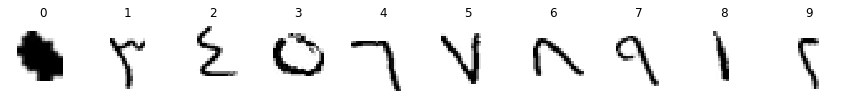

In [36]:
plt.figure(figsize=(15.,30.))
for i in range(data.shape[0]):
    plt.subplot(1,10,i+1)
    plt.title(i)
    plt.imshow(data[i]/255.,cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
path+='visual_sudoku/train/'
path

'./Assignment 2/visual_sudoku/train/'

In [8]:
X_path=path+'query/'
Y_path=path+'target/'

In [13]:
X=os.listdir(X_path)
print(len(X),X[0])
Y=os.listdir(Y_path)
print(len(Y),Y[0])

10000 3975.png
10000 3975.png


(224, 224) (224, 224)


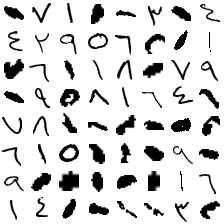

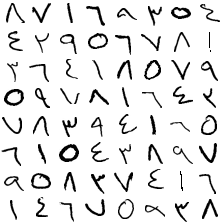

(224, 224) (224, 224)


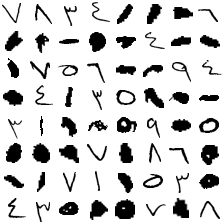

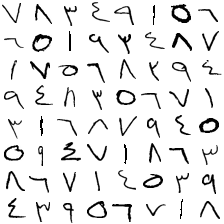

(224, 224) (224, 224)


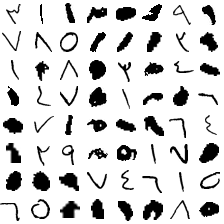

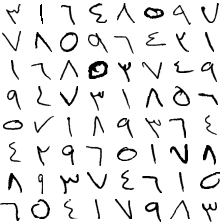

In [39]:
some_samples=['0','10','100']
for img in some_samples:
    x=Image.open(X_path+img+'.png')
    y=Image.open(Y_path+img+'.png')
    print(x.size, y.size)
    display(x)
    display(y)

# Get dataset for training cGAN

task is to assign appropriate labels using just one example from each : one-shot learning

ideas : 
1. 10-Means clustering, and assigning each cluster the best label (using euclidean distance)
2. Matching networks for one-shot learning : MAN

In [1]:
path = './Assignment 2/'
dataset_path=path+'visual_sudoku/train/query/'

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL.Image as Image

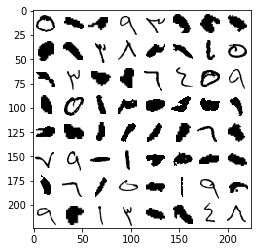

In [34]:
img = np.array(Image.open(os.path.join(dataset_path,'3975.png'))) # 224,224 = 64 * 28,28
plt.imshow(img,cmap='gray')
plt.show()

(8, 8, 28, 28)


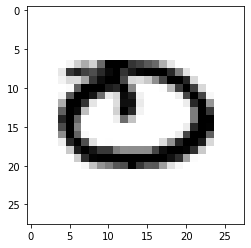

In [35]:
x=np.split(img,8)
y=[np.split(x_,8,axis=1) for x_ in x]
y=np.array(y)
print(y.shape)
plt.imshow(y[1,-1]/255.,cmap='gray')
plt.show()

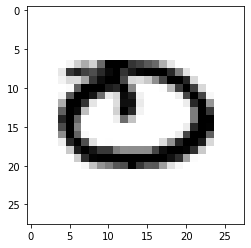

In [38]:
y=y.reshape((-1,28,28))
plt.imshow(y[15]/255., cmap='gray')
plt.show()

In [39]:
# print(os.listdir(dataset_path)[:5])
# X=[] #this will contain 28,28 images
# for img_name in os.listdir(dataset_path):
#     img = np.array(Image.open(os.path.join(dataset_path,img_name))) # 224,224 = 64 * 28,28
#     sub_imgs=np.split(img,8)
#     sub_imgs=[np.split(x_,8,axis=1) for x_ in sub_imgs]
#     sub_imgs=np.array(sub_imgs) # 8,8,28,28
#     sub_imgs=sub_imgs.reshape((-1,28,28))
#     X.append(sub_imgs)

['3975.png', '8820.png', '9280.png', '348.png', '1804.png']


In [40]:
# X=np.array(X)
# X=X.reshape((-1,28,28))
# print(X.shape, X.dtype)

(640000, 28, 28) uint8


In [3]:
# np.save('query_64k_images.npy', X)
X=np.load('query_64k_images.npy')

In [4]:
path

'./Assignment 2/'

In [22]:
oneshot_data=np.load(path+'sample_images.npy')
print(oneshot_data.shape)

(10, 28, 28)


In [6]:
from sklearn.cluster import KMeans as KMeans

In [7]:
# kmeans=KMeans(n_clusters=10).fit(X.reshape((-1,28*28))) : working with 28,28 images is not possible : Curse of Dimensionality

In [8]:
X=X/255.

In [10]:
X=X.reshape((-1,28*28))

In [11]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

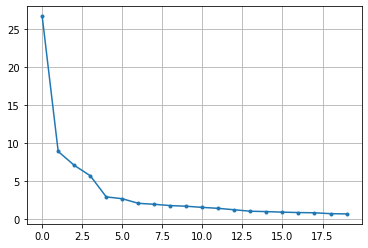

In [15]:
plt.plot(100*pca.explained_variance_ratio_,marker='.')
plt.grid()

In [17]:
print(sum(100*pca.explained_variance_ratio_[:5]),sum(100*pca.explained_variance_ratio_[5:]))

51.36684911775246 20.861400135295796


In [18]:
# taking first 5 principal components
pca=decomposition.PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
X_in_5D = pca.transform(X)
print(X_in_5D.shape,X_in_5D[:2])

(640000, 5) [[-0.90999226  0.1415776   1.35642735  5.42577282 -1.6703904 ]
 [ 1.44664982  4.00177241 -3.41978547 -1.23484445 -0.71589288]]


In [23]:
oneshot_data=oneshot_data/255.
oneshot_data=oneshot_data.reshape((-1,28*28))
oneshot_data_in_5D=pca.transform(oneshot_data)
print(oneshot_data_in_5D.shape,oneshot_data_in_5D[:2])

(10, 5) [[ 9.76699757 -2.25062596 -0.59347452 -0.70268069 -0.32628396]
 [-2.24179222 -2.72926742  2.26380454 -0.11653436 -1.23008147]]


In [25]:
print(X_in_5D.mean(axis=0))
print(oneshot_data_in_5D.mean(axis=0))

[-2.91478753e-13 -6.75733990e-14  7.88098614e-15 -1.30108263e-13
 -6.27937671e-14]
[ 0.00000000e+00 -2.22044605e-16 -6.66133815e-17  2.88657986e-16
  0.00000000e+00]


In [70]:
# np.save('X_in_5D.npy',X_in_5D)
# np.save('oneshot_data_in_5D.npy',oneshot_data_in_5D)
X_in_5D=np.load('X_in_5D.npy')
oneshot_data_in_5D=np.load('oneshot_data_in_5D.npy')

In [71]:
from sklearn.cluster import KMeans 

In [72]:
km=KMeans(n_clusters=10)
km.fit(X_in_5D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
print(km.cluster_centers_.shape, oneshot_data_in_5D.shape)
print(km.cluster_centers_[0])
print(oneshot_data_in_5D[0])

(10, 5) (10, 5)
[-4.16088308 -0.04563294  1.0732991  -0.48723227  0.03921213]
[ 9.76699757 -2.25062596 -0.59347452 -0.70268069 -0.32628396]


In [39]:
# finding euclidean distance
# np.linalg.norm?
# temp=oneshot_data_in_5D-km.cluster_centers_[0]
# print(temp.shape)
# print(temp[0])
# temp2=np.linalg.norm(temp,axis=1)
# print(temp2.shape)
# print(temp2[0])
# print(np.sqrt(np.sum(temp**2,axis=1))[0])

(10, 5)
[13.95501576 -2.14502486 -1.68948966 -0.22180718 -0.40955852]
(10,)
14.227259344057225
14.227259344057225


In [74]:
km.cluster_centers_

array([[-4.16088308, -0.04563294,  1.0732991 , -0.48723227,  0.03921213],
       [ 5.05961258,  1.18991919, -2.00116556, -0.04720648,  0.45864871],
       [ 1.71348428, -1.9445355 , -3.3655835 , -1.84547007, -0.22806692],
       [ 2.43549553, -3.62268789,  2.22965287, -1.77233961, -0.20994577],
       [-3.03991755,  0.40841968, -0.67946908,  0.45878384, -1.49939177],
       [ 2.27617838,  3.26143935,  3.15443979, -1.44292105,  0.32504947],
       [-2.73500512, -0.87650407, -0.77498112,  0.4574112 ,  2.26755268],
       [ 1.22807092,  4.8824125 , -1.54837018, -1.19068104, -0.24789308],
       [-0.83860897, -0.62549539,  0.08183846,  4.92276415, -0.25555767],
       [ 6.84022308, -0.76105177,  1.36256246,  1.17407786, -0.13259699]])

In [104]:
l2l=[]
for label in range(10):
    L2_distances=np.linalg.norm(oneshot_data_in_5D-kmeans_clusters[label],axis=1)
    for t in l2l:
        L2_distances[t]=100
    l2l.append(L2_distances.argmin())

In [105]:
l2l=np.array(l2l)
print(l2l, type(l2l))
# print(oneshot_data_in_5D)
# print(X_in_5D)

[8 7 0 9 1 5 3 4 6 2] <class 'numpy.ndarray'>


In [107]:
Y=km.labels_
print(Y.shape)
print(Y)
Y=l2l[Y]
print(Y)

(640000,)
[8 7 2 ... 0 5 2]
[6 4 0 ... 8 5 0]


In [109]:
# np.save('query_64k_labels.npy',Y.astype(np.uint8))
Y=np.load('query_64k_labels.npy')

# cGAN

In [2]:
X=np.load('query_64k_images.npy')
Y=np.load('query_64k_labels.npy')
print(X.shape, Y.shape, X.dtype, Y.dtype)

(640000, 28, 28) (640000,) uint8 uint8


In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
Y = mnist.target
print(X.shape, Y.shape)

(70000, 784) (70000,)
